# Importing & Preparing Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.optimize as opt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy
import scipy.sparse as sparse

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Lineary separable data')

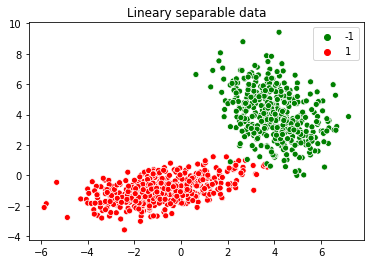

In [2]:
n1=500
n2=400
np.random.seed(4)
X=np.r_[np.random.multivariate_normal([-1,-1],[[3,1],[0,.5]],n1),np.random.multivariate_normal([4,4],[[1,0],[-1,3]],n2)]
Y=np.array([(i<n1)*2-1 for i in range(n1+n2)])
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)
fig,ax = plt.subplots()
sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y,ax=ax,palette=["g","r"]);
ax.set_title("Lineary separable data")


In [3]:
def compare(alpha_range,cls):  
    alpha_range
    linear_svc=[cls(u) for u in alpha_range]
    n = len(alpha_range)
    fig,ax = plt.subplots(int(np.ceil(n/2)),2,sharex=True,sharey=True,figsize=(12,12))

    for i in range(n):
        linear_svc[i].fit(X_train,Y_train)
        sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=Y_test,ax=ax[i//2,i%2],palette=["g","r"]);
        x_limits=np.array([np.min(X[:,0]),np.max(X[:,0])])
        sns.lineplot(x_limits,(linear_svc[i].w[0]-linear_svc[i].w[1]*x_limits)/linear_svc[i].w[2],ax=ax[i//2,i%2],color="k")
        sns.lineplot(x_limits,(linear_svc[i].w[0]-linear_svc[i].w[1]*x_limits-1)/linear_svc[i].w[2],ax=ax[i//2,i%2],color="g")
        sns.lineplot(x_limits,(linear_svc[i].w[0]-linear_svc[i].w[1]*x_limits+1)/linear_svc[i].w[2],ax=ax[i//2,i%2],color="r")
        ax[i//2,i%2].set_title("$\\alpha={}$\tAccuarcy: {}".format(alpha_range[i],linear_svc[i].score(X_test,Y_test)))


# Linear Support Vector Machine
# I Deriving SVM
We will begin with the binary classification problem, which can then be trivially generalized to multi-class problems using OneVsOne or OneVsAll
## 1.Notations & Definitions

### 1.1. Experience
- We will denote by $\mathbb{1}_i \in \mathbb{R}^i $ the vector of ones $\forall i \in \mathbb{N}$ 
- Let $E$ be the inner product space of features
- Let $H=\mathbb{R}\times E$ be the inner product space of parameters 
- For each $\omega = \left(\omega_0,\dots,\omega_m\right)\in H$, we will denote by $\omega_*=\left(\omega_1,\dots,\omega_m\right)$ 
- Let $m\in \mathbb{N}^*$ the number of features.
- Let $n \in \mathbb{N}^*$ the number of samples
- Let $X \in E^n$ be a tuple of input samples 
- Let $y \in \{-1,1\}^n$ be a tuple of ouput samples
- We will denote the $k^\text{th}$ sample by $x_k=X_k$
### 1.2. Seperating Plane
- Let $\chi = \left\{x_i,i\in\{1,\dots,n\}\right\}$
- Let $\chi_+=\left\{ x_i/y_i=1,i\in\{1,\dots,n\} \right\}$ be the positive class and $\chi_-=\left\{ x_i/y_i=-1,i\in\{1,\dots,n\} \right\}$ be the negative class
- Let $$\mathcal{P}_\omega:\omega_*^Tx-\omega_0=0,\quad \mathcal{P}_\omega^+:\omega_*^Tx-\omega_0=1,\quad \mathcal{P}^-_\omega:\omega_*^Tx-\omega_0=-1$$ 
Here $\mathcal{P}_\omega$ is the plane seperating the two classes
- Let $\mathcal{R}_\omega=\left\{x\in E/\quad \lvert\omega^Tx-b\rvert \le 1 \right\}$, $\mathcal{R}_\omega$ is the margin: the region between $\mathcal{P}_\omega^-$ and $\mathcal{P}_\omega^+$
- Let $\mathcal{R}_\omega^+ =\left\{x\in E/\quad \omega^Tx-b \ge 1 \right\},\quad \mathcal{R}_\omega^-=\left\{x\in E/\quad \omega^Tx-b \le -1 \right\}$
### 1.3. Objective function
- Let $h \in \mathscr{F}\left(E\times H,\mathbb{R}\right) / \quad \forall x \in E,\forall \omega \in H ,h(x)=\omega_*^Tx-w_0$

## 2. Results
### 2.1 Width of the margin
Let $\omega \in H$
Let $s$ be the distance between two points $u_+\in \mathcal{P}_{\omega_*}^+$ and $u_- \in \mathcal{P}_{\omega_*}^-$ along the normal vector $\omega_*$
$$ s= \frac{\lvert\omega_*^T(u_+-u_-)\rvert}{\lVert\omega_*\rVert} =\frac{\lvert\omega_*^Tu_+-\omega_*^Tu_-)\rvert}{\lVert\omega_*\rVert} = 
\frac{\lvert(1+b)-(-1+b))\rvert}{\lVert\omega_*\rVert}=\frac{2}{\lVert\omega_*\rVert}$$
This width does only depend on $\omega_*$

### 2.2 Existence of strictly positive margin for Lineary Separable classes
$\DeclareMathOperator{\sign}{sign}$
Because the classes are lineary seperable: $$\exists\omega\in H/ \forall x \in \chi,\sign(h(x,\omega))=
\begin{cases}
1 \text{ if } x \in \chi_+ \\
-1 \text{ if } x \in \chi_- \\
\end{cases}$$ 
Knowing that $\chi$ is finite and $\chi \cap \mathcal{P}_\omega = \emptyset$, we have: $$\inf_{x\in \chi}d(x,\mathcal{P_\omega})= \inf_{x\in \chi}\dfrac{\lvert\omega_*^Tx-\omega_0\rvert}{\lVert\omega_*\rVert} =l\in\mathbb{R}_+^*$$
So by choosing $\omega'$ such that $\omega'=\frac{\omega}{l}$
We have: $$ \forall x\in \chi_+, \omega_*'^Tx-w'_0-1=\frac{\omega_*^Tx-w_0}{l}-1\ge \frac{l}{l}-1\ge 0 \\ 
\forall x\in \chi_-, \omega_*'^Tx-w'_0+1=\frac{\omega_*^Tx-w_0}{l}+1\le \frac{-l}{l}+1\le 0$$
So we can separe them with a margin that has a strictly positive width such that
$$ \begin{cases}
\chi_+ \subset \mathcal{R}_{\omega'}^+ \\
\chi_- \subset \mathcal{R}_{\omega'}^-\end{cases}
$$


## 3. Stating Problem
### 3.1 Lineary Separable classes
We want to find the plane with the maximum margin, so we must maximize $s=\frac{2}{\lVert\omega_*\rVert}$ subject to $h(x_+,\omega)\ge1$ and $h(x_-,\omega)\le1$, it can be simplified to
$$ \omega^*=\arg \min_{\omega\in H} \lVert \omega_* \rVert \quad\text{subject to}\quad y_ih(x_i,\omega)\ge 1 \quad\forall i \in \{1,\dots,n\}$$
### 3.2 General Case
We introduce a cost function penalizing each $x\in\chi_+\cap\mathcal{R}_\omega^-$ and each $x\in\chi_-\cap\mathcal{R}_\omega^+$, a standard choice is: 
$$\mathscr{L} \in \mathscr{F}\left(H,\mathbb{R}\right)/\quad \forall \omega \in H \quad \mathscr{L}(\omega)
=\sum_{i=1}^n \max\left(0,1-y_ih(x_i,\omega)\right) + \alpha \lVert\omega_*\rVert $$ 
Our objective is then to find: 
$$ \omega^*=\arg \min_{\omega\in H} \mathscr{L}(\omega) $$

### 3.3 Smooth formulation of the General Case
Let $E_+=\mathbb{R}_+^n$

Our cost function $\mathscr{L}$ is not of class $\mathscr{C}^1$, so many numerical methods for finding the minimum will fail.

To address this, we can introduce the following smooth function:
$$ \mathscr{D} \in \mathscr{C}^\infty\left(H^*\times E_+,\mathbb{R}\right)/ \quad \forall \omega\in H^*,\forall \zeta \in E_+, \quad \mathscr{D}(\omega,\zeta)=\lVert\zeta\rVert_1 + \alpha\lVert\omega_*\rVert $$
Our objective is then to find:
$$ (\omega^*,\zeta^*)=\arg \min_{(\omega,\zeta)\in H^*\times E_+} \mathscr{D}(\omega) \quad \text{subject to} \quad
\begin{cases}
y_ih(x_i,\omega)\ge 1 - \zeta_i \quad \forall i \in\{1,\dots,n\}\\
\zeta_i \ge 0   \quad \forall i \in\{1,\dots,n\} \quad (\text{implied by } \zeta\in E_+)
\end{cases}$$
This formulation is equivalent to the one above
#### Proof:
- Let $\omega\in H,\zeta \in E$
we have: 
$$\forall i \in \{1,\dots,n\}, \begin{cases}\zeta_i\ge 0 \\ \zeta_i \ge 1- y_ih(x_i,y_i)\end{cases}\implies \forall i \in \{1,\dots,n\}, \zeta_i \ge \max(0,1- y_ih(x_i,y_i))$$
We have then:
$$ \mathscr{D}(\omega,\zeta)= \lVert\zeta\rVert_1 + \alpha\lVert\omega_*\rVert = \sum_{i=1}^n \zeta_i + \alpha\lVert\omega_*\rVert
\ge \mathscr{L}(\omega)$$
- Let $ \omega^*=\arg \min_{\omega\in H} \mathscr{L}(\omega),\zeta^*\in E_+ /\quad \zeta_i=\max\left(0,1-y_ih(x_i,\omega^*)\right)$

We have the following equality
$$
\mathscr{D}(\omega^*,\zeta^*)=\sum_{i=1}^n \max\left(0,1-y_ih(x_i,\omega)\right) + \alpha \lVert\omega_*\rVert = \mathscr{L}(\omega^*)
$$


## 4. Effect of $\alpha$
$\alpha$ gives a tradeoff between correctly assigning the classes (for $\alpha$ small enough) and maximizing the width of the margin ($\alpha$ big enough)

In [4]:
class LinearSVC1:
    def __init__(self,alpha=1):
        self.alpha=alpha
    def decision_function(self,X):
            return X@self.w[1:]-self.w[0]
    def cost(self,X,Y,w):
        return np.sum(np.maximum(0,1-Y*(X@w[1:]-w[0])))+self.alpha*np.linalg.norm(w[1:])
    def fit(self,X,Y,method=0):
        self.method=method
        R=opt.minimize(lambda w:self.cost(X,Y,w),x0=np.zeros(X.shape[1]+1),method = 'Nelder-Mead')
        self.w=R.x
        return self
    def predict(self,X):
        return np.sign(self.decision_function(X))
    def parameters(self):
        return self.w
    def score(self,X,Y):
        return (self.predict(X)==Y).mean()

## Linear Seperation

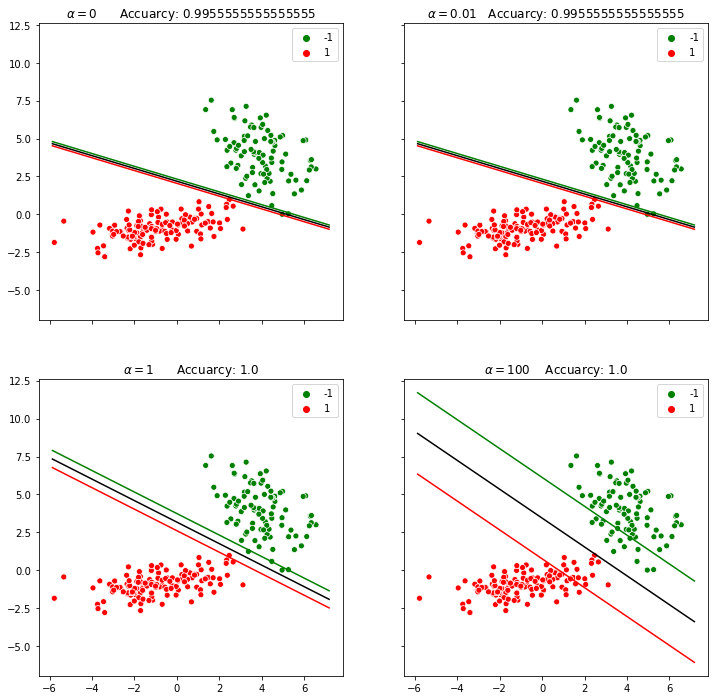

In [5]:
alpha_range=[0,0.01,1,100]
compare(alpha_range,LinearSVC1)

## 2 Smooth Formulation

In [6]:
class LinearSVC2:
    def __init__(self,alpha=1):
        self.alpha=alpha
    def decision_function(self,X):
            return X@self.w[1:]-self.w[0]
    def cost(self,X,Y,w):
        jac=np.r_[0,self.alpha*w[1:X.shape[1]+1],np.ones(X.shape[0])]
        return self.alpha*np.sum(w[1:X.shape[1]+1]**2)/2+np.sum(w[X.shape[1]:]),jac
    def fit(self,X,Y):
        zeta_coeff=np.eye(X.shape[0])
        w_coeff=np.c_[-Y,(Y*X.T).T]
        A=np.c_[w_coeff,zeta_coeff]
        B=np.c_[np.zeros([X.shape[0],X.shape[1]+1]),np.eye(X.shape[0])]
        constraint1 = scipy.optimize.LinearConstraint(scipy.sparse.bsr_matrix(A),lb=1,ub=np.inf)
        constraint2=scipy.optimize.LinearConstraint(scipy.sparse.bsr_matrix(B),lb=0,ub=np.inf)
        O=opt.minimize(lambda w:self.cost(X,Y,w),jac=True,x0=np.random.normal(0,1,X.shape[1]+1+X.shape[0]),constraints=[constraint1,constraint2])
        self.w=O.x[:X.shape[1]+1]
        return self
    def predict(self,X):
        return np.sign(self.decision_function(X))
    def parameters(self):
        return self.w
    def score(self,X,Y):
        return (self.predict(X)==Y).mean()

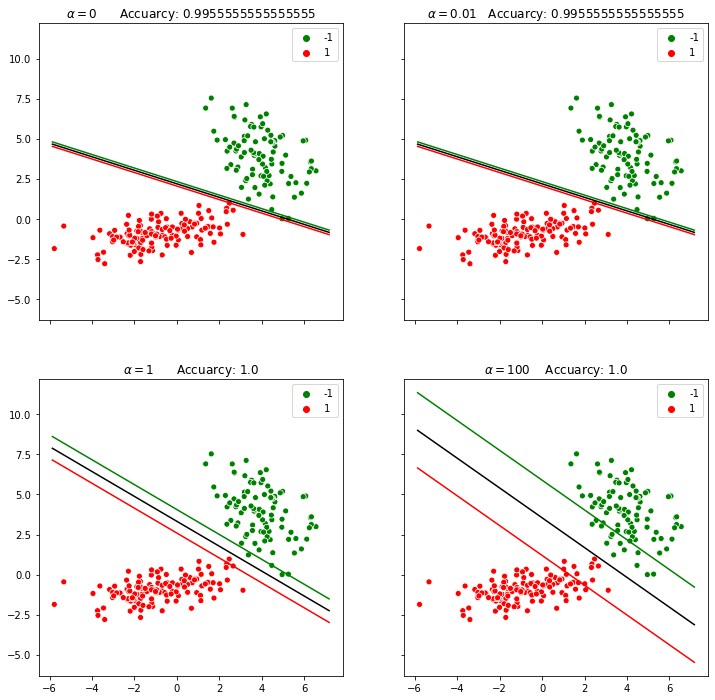

In [7]:

alpha_range=[0,0.01,1,100]
compare(alpha_range,LinearSVC2)


0.9310839913854989


['spam_model.joblist']

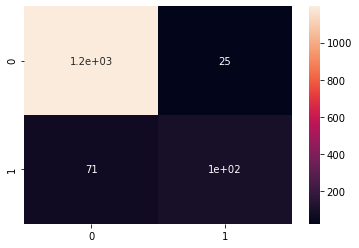

In [22]:
np.unique(predictor.predict(X_test))

array([-1.,  1.])

(50, 50)


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Lineary separable data')

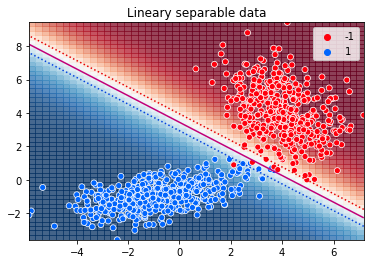

In [88]:
fig,ax=plt.subplots()
model=LinearSVC1().fit(X,Y)
x=np.linspace(np.min(X[:,0]),np.max(X[:,0]))
y=np.linspace(np.min(X[:,1]),np.max(X[:,1]))
X_mesh,Y_mesh=np.meshgrid(x,y)
U_mesh=np.array([X_mesh,Y_mesh]).transpose(1,2,0)
Y_mesh=model.decision_function(U_mesh)
print(Y_mesh.shape)

c = ax.pcolormesh(U_mesh[:,:,0], U_mesh[:,:,1], np.tanh(.225*Y_mesh), cmap='RdBu',alpha=.75)
c = ax.contour(U_mesh[:,:,0], U_mesh[:,:,1], Y_mesh, levels=[-1,0,1],
               colors=["xkcd:red","xkcd:magenta","xkcd:blue"],linestyles=["dotted","solid","dotted"])
sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y,ax=ax,palette=["xkcd:bright red","xkcd:bright blue"]);
ax.set_title("Lineary separable data")
